environment

In [41]:
using Pkg
envpath = expanduser("~/envs/deeptraining/")
Pkg.activate(envpath)

  Activating project at `~/envs/deeptraining`


In [42]:
# libs
using Flux: Chain
using Images
using DataFrames
using CSV
using FLoops

In [43]:
# private libs
using PreprocessingImages; p=PreprocessingImages
include("./transformations.jl")

3-element Vector{String}:
 "log2/"
 "gamma30/"
 "gamma05/"

In [44]:
workpath

"~/projects/deeptraining/dataset/"

In [45]:
# input folders
datasetPath  = "/scratch/cirobr/datasets/pascalvoc/VOCdevkit/VOC2012/"
imagesPath   = datasetPath * "JPEGImages/"
masksPath    = datasetPath * "SegmentationClass/"
cowslist     = datasetPath * "ImageSets/Main/cow_trainval.txt"

# output folders
workpath = pwd() * "/"
workpath = replace(workpath, homedir() => "~")
resizedImagesPath = workpath * "resized/images/"
resizedMasksPath  = workpath * "resized/masks/"
augmentedImagesPath = workpath * "augmented/images/"
augmentedMasksPath  = workpath * "augmented/masks/"
mkpath(expanduser(augmentedImagesPath))
mkpath(expanduser(augmentedMasksPath))

"/home/cirobr/projects/deeptraining/dataset/augmented/masks"

dataset

In [46]:
# input dataframe
fpfn = expanduser(workpath) * "dftrain-coi-resized.csv"
dftrain = CSV.read(fpfn, DataFrame)
first(dftrain, 3)

Row,X,y,label,segmented
,String,String?,Int64,Int64
1,~/projects/deeptraining/dataset/resized/images/2009_002422.jpg,~/projects/deeptraining/dataset/resized/masks/2009_002422.png,1,1
2,~/projects/deeptraining/dataset/resized/images/2008_000073.jpg,~/projects/deeptraining/dataset/resized/masks/2008_000073.png,1,1
3,~/projects/deeptraining/dataset/resized/images/2009_003542.jpg,~/projects/deeptraining/dataset/resized/masks/2009_003542.png,1,1


In [47]:
size(dftrain)

(146, 4)

In [48]:
workpath

"~/projects/deeptraining/dataset/"

In [49]:
# translational_transformations (transformed mask needed)
# translational_folders
# pixel_transformations (default mask)
# pixel_folders

transformations        = vcat(translational_transformations, pixel_transformations)
transformation_folders = vcat(translational_folders, pixel_folders)

transformation_path    = workpath * "augmented/"
folders                = transformation_path .* transformation_folders
folders                = [folder .* ["images/", "masks/"] for folder in folders]
folders                = reduce(vcat, folders)

mkpath.(expanduser.(folders))

16-element Vector{String}:
 "/home/cirobr/projects/deeptraining/dataset/augmented/flipX/images"
 "/home/cirobr/projects/deeptraining/dataset/augmented/flipX/masks"
 "/home/cirobr/projects/deeptraining/dataset/augmented/rotateR/images"
 "/home/cirobr/projects/deeptraining/dataset/augmented/rotateR/masks"
 "/home/cirobr/projects/deeptraining/dataset/augmented/rotateL/images"
 "/home/cirobr/projects/deeptraining/dataset/augmented/rotateL/masks"
 "/home/cirobr/projects/deeptraining/dataset/augmented/flipXrotateR/images"
 "/home/cirobr/projects/deeptraining/dataset/augmented/flipXrotateR/masks"
 "/home/cirobr/projects/deeptraining/dataset/augmented/flipXrotateL/images"
 "/home/cirobr/projects/deeptraining/dataset/augmented/flipXrotateL/masks"
 "/home/cirobr/projects/deeptraining/dataset/augmented/log2/images"
 "/home/cirobr/projects/deeptraining/dataset/augmented/log2/masks"
 "/home/cirobr/projects/deeptraining/dataset/augmented/gamma30/images"
 "/home/cirobr/projects/deeptraining/dataset/a

In [50]:
# schedule transformations for images
image_transformations = transformations
image_transformation_folders = transformation_path .* ( transformation_folders .* ["images/"] )

8-element Vector{String}:
 "~/projects/deeptraining/dataset/augmented/flipX/images/"
 "~/projects/deeptraining/dataset/augmented/rotateR/images/"
 "~/projects/deeptraining/dataset/augmented/rotateL/images/"
 "~/projects/deeptraining/dataset/augmented/flipXrotateR/images/"
 "~/projects/deeptraining/dataset/augmented/flipXrotateL/images/"
 "~/projects/deeptraining/dataset/augmented/log2/images/"
 "~/projects/deeptraining/dataset/augmented/gamma30/images/"
 "~/projects/deeptraining/dataset/augmented/gamma05/images/"

In [51]:
# schedule transformations for masks
mask_transformations = translational_transformations
mask_transformation_folders = transformation_path .* ( translational_folders .* ["masks/"] )

5-element Vector{String}:
 "~/projects/deeptraining/dataset/augmented/flipX/masks/"
 "~/projects/deeptraining/dataset/augmented/rotateR/masks/"
 "~/projects/deeptraining/dataset/augmented/rotateL/masks/"
 "~/projects/deeptraining/dataset/augmented/flipXrotateR/masks/"
 "~/projects/deeptraining/dataset/augmented/flipXrotateL/masks/"

In [52]:
# augment images
selected_transformations = image_transformations
input_filenames          = dftrain.X
output_folders           = image_transformation_folders

@floop for file in input_filenames
    img = Images.load(expanduser(file))
    
    for (i,transformation) in enumerate(selected_transformations)
        transformed_img = transformation(img) .|> RGB
        local fpfn = expanduser(output_folders[i]) * basename(file)
        Images.save(fpfn, transformed_img)
    end
end

In [53]:
# augment masks
selected_transformations = mask_transformations
input_filenames          = dftrain[dftrain.segmented .== 1, :].y
output_folders           = mask_transformation_folders

@floop for file in input_filenames
    img = Images.load(expanduser(file))
    
    for (i,transformation) in enumerate(selected_transformations)
        transformed_img = transformation(img) .|> RGB
        local fpfn = expanduser(output_folders[i]) * basename(file)
        Images.save(fpfn, transformed_img)
    end
end

create output dataframe

In [54]:
dfaugmented = copy(dftrain)   # add resized images to dfaugmented
display(size(dfaugmented))
first(dfaugmented, 3)

(146, 4)

Row,X,y,label,segmented
,String,String?,Int64,Int64
1,~/projects/deeptraining/dataset/resized/images/2009_002422.jpg,~/projects/deeptraining/dataset/resized/masks/2009_002422.png,1,1
2,~/projects/deeptraining/dataset/resized/images/2008_000073.jpg,~/projects/deeptraining/dataset/resized/masks/2008_000073.png,1,1
3,~/projects/deeptraining/dataset/resized/images/2009_003542.jpg,~/projects/deeptraining/dataset/resized/masks/2009_003542.png,1,1


In [55]:
# augmented dataframe
for transformation in translational_folders
    dftemp = copy(dftrain)
    @. dftemp.X = replace(dftemp.X, "/resized/" => "/augmented/" * transformation)
    @. dftemp.y[dftemp.segmented == 1] = replace(dftemp.y[dftemp.segmented == 1,:], "/resized/" => "/augmented/" * transformation)   # only for segmented == 1

    dfaugmented = vcat(dfaugmented, dftemp)
end
size(dfaugmented)

(876, 4)

In [56]:
dfaugmented[200,:]

Row,X,y,label,segmented
,String,String?,Int64,Int64
200,~/projects/deeptraining/dataset/augmented/flipX/images/2011_002885.jpg,~/projects/deeptraining/dataset/augmented/flipX/masks/2011_002885.png,1,1


In [57]:
# augmented dataframe
for transformation in pixel_folders
    dftemp = copy(dftrain)
    @. dftemp.X = replace(dftemp.X, "/resized/" => "/augmented/" * transformation)
    # keep the same mask

    dfaugmented = vcat(dfaugmented, dftemp)
end
size(dfaugmented)

(1314, 4)

In [58]:
dfaugmented[900,:]

Row,X,y,label,segmented
,String,String?,Int64,Int64
900,~/projects/deeptraining/dataset/augmented/log2/images/2011_001232.jpg,~/projects/deeptraining/dataset/resized/masks/2011_001232.png,1,1


In [59]:
# save output dataframe
fpfn = expanduser(workpath) * "dfaugmented-coi-resized.csv"
CSV.write(fpfn, dfaugmented)

"/home/cirobr/projects/deeptraining/dataset/dfaugmented-coi-resized.csv"

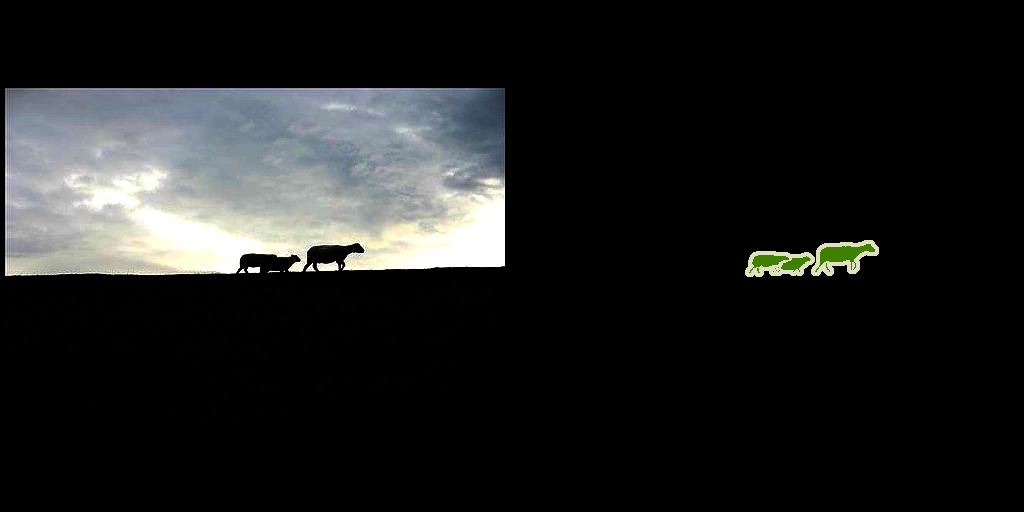

In [67]:
# checkpoint
df = CSV.read(expanduser(workpath) * "dfaugmented-coi-resized.csv", DataFrame)

k = rand(1:size(df, 1))
img = Images.load(expanduser(df.X[k]))
if df.segmented[k] == 1
    mask = Images.load(expanduser(df.y[k]))
else
    mask = zeros(size(img))
end
mosaicview([img, mask]; nrow=1)